In [39]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-03-26 01:19:49,049: Credentials are already in use. The existing account in the session will be replaced.


In [40]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [41]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [42]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [112]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)
a_shuffled[0]

NameError: name 'long' is not defined

In [94]:
b_shuffled

AttributeError: 'numpy.ndarray' object has no attribute 'int'

In [44]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

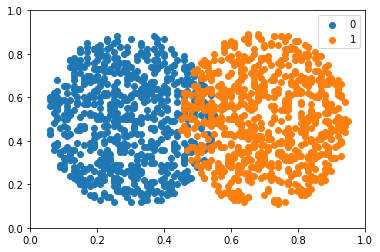

In [45]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [47]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    qc.cz(qr[0],qr[1])
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1

lossCal2qubit(8,[1,1,1,1],10)

0.19999999999999996

## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *
import qiskit.circuit.library 
from qiskit.circuit.library import rx

In [48]:
from numpy import pi
device = torch.device("cuda:0") # Uncomment this to run on GPU

## Load the data

In [96]:
import torch.utils.data as data_utils
#Make a tensor data
X_data=torch.from_numpy(a_shuffled)
#Make a tensor label
X_targets=torch.from_numpy(b_shuffled.astype(int))
#Combine them together
train = data_utils.TensorDataset(X_data, X_targets)
#Load data, and split into 100
train_loader = data_utils.DataLoader(train, batch_size=100, shuffle=True)

In [97]:
train_loader

# Sample

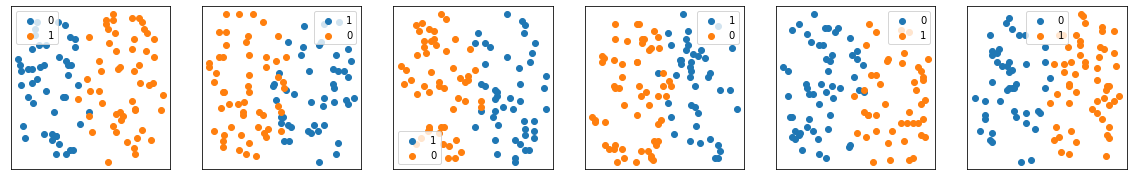

In [98]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(20, 3))

while n_samples_show > 0:
    
    point, targets = data_iter.__next__()
    lab=np.array(targets)
    counter=Counter(lab)
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        axes[n_samples_show - 1].scatter(
            point[row_ix, 0], point[row_ix, 1], label=str(label)
        )
    axes[n_samples_show - 1].legend()
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])

    
    n_samples_show -= 1

# Training Data

In [145]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts(self._circuit)
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])

In [70]:
conv1(x)

NameError: name 'conv1' is not defined

In [67]:
nn.Linear(20, 30)

Linear(in_features=20, out_features=30, bias=True)

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.distributions import constraints

In [89]:
long(X_targets

tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.int32)

In [153]:
train_X, test_X, train_y, test_y = train_test_split(X_data, X_targets, test_size=.5)

In [154]:
train_X = Variable(torch.Tensor(train_X.float()))
test_X = Variable(torch.Tensor(test_X.float()))
train_y =train_y.type(torch.LongTensor)
test_y = train_y.type(torch.LongTensor)

In [133]:
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    qc.cz(qr[0],qr[1])
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1

lossCal2qubit(8,[1,1,1,1],10)

In [ ]:
class Net(nn.Module):
  def __init__(self,input_size,hidden_size):
    super().__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.output=nn.Linear(hidden_size,2)
    self.softmax = nn.Softmax(dim=1)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=self.output(x)
    x=self.softmax(x)
    return x

In [162]:
hidden_layers=10
net=Net(input_size=2,hidden_size=hidden_layers) #Input size is 2
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1)
losses=[]
for epoch in range(10000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
        
        
plt.title("CrossEntropy")
plt.xlabel("step")
plt.ylabel("loss")
print('number of epoch', epoch, 'loss', loss.data)
predict_out = net(train_X)
_, predict_y = torch.max(predict_out, 1)
print("Train Accuracy:",accuracy_score(train_y.data, predict_y.data))
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)
print("Test Accuracy:",accuracy_score(test_y.data, predict_y.data))
plt.plot(losses)

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\result\result.py:368: UserWarning: Result object contained multiple results matching name "circuit3111", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


ValueError: Expected input batch_size (1) to match target batch_size (750).

In [126]:
#Defining the mesh for contour plots
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 40)
mesh = np.meshgrid(x, y)
a=np.zeros((2000,2))
a[:,0]=np.ravel(mesh[0])
a[:,1]=np.ravel(mesh[1])
contour_test=torch.Tensor(a)

In [127]:
predict_out = net(contour_test)
contour_plot=predict_out.detach().numpy()[:,1]

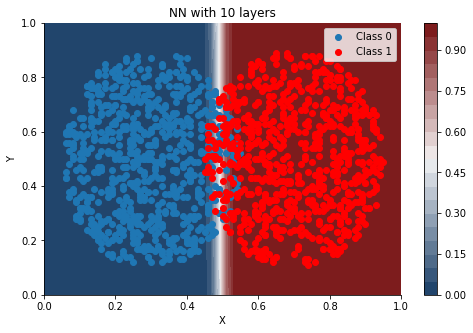

In [128]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 5))
contour=ax.contourf(mesh[0], mesh[1], contour_plot.reshape(40,50),20, cmap=cmap);
cbar = plt.colorbar(contour)
ax.scatter(X_data[X_targets==0, 0], X_data[X_targets==0, 1], label='Class 0')
ax.scatter(X_data[X_targets==1, 0], X_data[X_targets==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='NN with {} layers'.format(hidden_layers));

In [157]:
losses

[0.5]

In [158]:
class Net(nn.Module):
  def __init__(self,input_size,hidden_size):
    super().__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.output=nn.Linear(hidden_size,2)
    self.hybrid = Hybrid(qiskit.Aer.get_backend('qasm_simulator'), 100, np.pi/2)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=self.output(x)
    x=self.hybrid(x)
    return x

In [176]:
hidden_layers=10
net=Net(input_size=2,hidden_size=hidden_layers) #Input size is 2
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=1)
losses=[]
for epoch in range(10000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
        
        
plt.title("CrossEntropy")
plt.xlabel("step")
plt.ylabel("loss")
print('number of epoch', epoch, 'loss', loss.data)
predict_out = net(train_X)
_, predict_y = torch.max(predict_out, 1)
print("Train Accuracy:",accuracy_score(train_y.data, predict_y.data))
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)
print("Test Accuracy:",accuracy_score(test_y.data, predict_y.data))
plt.plot(losses)

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\result\result.py:368: UserWarning: Result object contained multiple results matching name "circuit6117", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


RuntimeError: Function HybridFunctionBackward returned an invalid gradient at index 0 - got [1, 750, 1] but expected shape compatible with [750, 2]

In [175]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None,None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [169]:
criterion(out, train_y)

tensor(0.5000, dtype=torch.float64, grad_fn=<L1LossBackward>)

In [174]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

# trying again

In [9]:
import torch
torch.cuda.is_available()

x = torch.randn(4, 4)
y = torch.randn(4, 4)

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

In [6]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data2a.txt'
data1Label = r'../dataset/data2alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [7]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

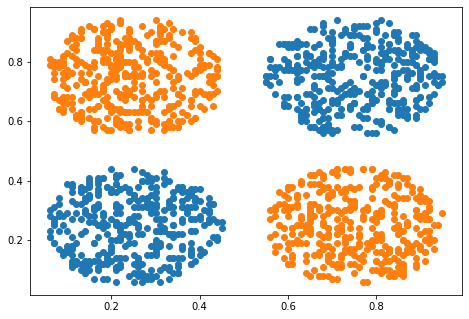

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [4]:
#load the SPSA optimizer from the optimizer.py file
from optimizer import *

In [5]:
#load the simulation functcions from the quantumcircuit.py file

from quantumcircuit import *

[loss2qubit(data[j][0],data[j][1],currentParams) for j in data_ixs]

0

In [17]:
torch.from_numpy(dataCoords)

tensor([[0.2100, 0.3900],
        [0.2300, 0.2200],
        [0.2500, 0.3400],
        ...,
        [0.7900, 0.3800],
        [0.5900, 0.3500],
        [0.6700, 0.1500]], dtype=torch.float64)

In [19]:
import torch
torch.cuda.is_available()

x = torch.from_numpy(dataCoords)
y = torch.from_numpy(dataLabels)
currentParams=[0,0,0,0]
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    loss2qubit(x,y,currentParams)

CircuitError: "Invalid param type <class 'torch.Tensor'> for gate rx."

In [22]:
x[0]

tensor([0.2100, 0.3900], device='cuda:0', dtype=torch.float64)

In [ ]:
for j in range(300):      
    
    cj = c/(j+1)**(1/3)
    aj = a/(j+1)

    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(2)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss2qubit(data[j][0],data[j][1],currentParams) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([quick_predict(data[j][0],currentParams) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     